In [1]:
#Time series dengan metode moving avarage sebagai prediksi di musim depan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline

In [2]:
df = pd.read_csv('monthly-milk-production.csv', index_col='Month')
df.head()

,Milk Production
Month,
1962-01-01 01:00:00,589
1962-02-01 01:00:00,561
1962-03-01 01:00:00,640
1962-04-01 01:00:00,656
1962-05-01 01:00:00,727


In [3]:
df.index = pd.to_datetime(df.index)

In [4]:
df.describe()

,Milk Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


In [5]:
df_mean = df.rolling(6).mean()

In [6]:
x = df.values
window = 6
history = [x[i] for i in range(window)]
test = [x[i] for i in range(window, len(x))]
predict = list()
for t in range(len(test)):
    length = len(history)
    yh = np.mean([history[i] for i in range(length-window, length)])
    obs = test[t]
    predict.append(yh)
    history.append(obs)
    print('Predicted=%f, Expected=%f' % (yh, obs))
error = mse(test, predict)
print('Test MSE: %.3f' % error)

Predicted=645.000000, Expected=640.000000
Predicted=653.500000, Expected=599.000000
Predicted=659.833333, Expected=568.000000
Predicted=647.833333, Expected=577.000000
Predicted=634.666667, Expected=553.000000
Predicted=605.666667, Expected=582.000000
Predicted=586.500000, Expected=600.000000
Predicted=579.833333, Expected=566.000000
Predicted=574.333333, Expected=653.000000
Predicted=588.500000, Expected=673.000000
Predicted=604.500000, Expected=742.000000
Predicted=636.000000, Expected=716.000000
Predicted=658.333333, Expected=660.000000
Predicted=668.333333, Expected=617.000000
Predicted=676.833333, Expected=583.000000
Predicted=665.166667, Expected=587.000000
Predicted=650.833333, Expected=565.000000
Predicted=621.333333, Expected=598.000000
Predicted=601.666667, Expected=628.000000
Predicted=596.333333, Expected=618.000000
Predicted=596.500000, Expected=688.000000
Predicted=614.000000, Expected=705.000000
Predicted=633.666667, Expected=770.000000
Predicted=667.833333, Expected=736

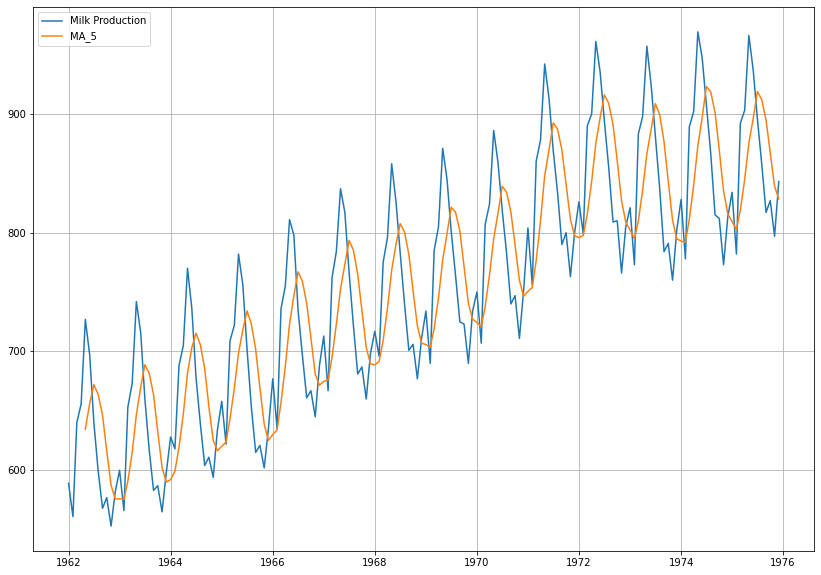

In [7]:
plt.figure(figsize=(14,10))
plt.grid(True)
plt.plot(df, label='Milk Production')
plt.plot(df_mean, label='MA_6')
plt.plot()
plt.legend(loc=2)